In [ ]:
import tensorflow as tf

# Liste uniquement les GPU disponibles
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
# Affiche chaque GPU
if gpus:
    print("GPUs disponibles :")
    for gpu in gpus:
        print(gpu)
else:
    print("Aucun GPU disponible")


In [1]:
import tensorflow as tf
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
input_shape= 128

def load_and_preprocess_image(filename):
    """Charge une image à partir d'un fichier et la redimensionne à 196x196."""
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    # img = tf.image.resize(img, [input_shape, input_shape])
    img = img.numpy()  # Convertir en tableau NumPy
    return img

def load_images_from_directory(directory_path, max_images_per_label=None):
    """Charge toutes les images dans le répertoire et les étiquettes selon le nom du sous-dossier.
       Limite le nombre d'images par label à max_images_per_label.
       Choisit de charger des images avec ou sans le suffixe d'augmentation."""
    image_paths = []
    labels = []
    label_names = []

    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            label_image_count = 0
            for filename in os.listdir(label_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Check if the filename should be included based on the augmentation flag
                        if max_images_per_label is not None and label_image_count >= max_images_per_label:
                            break
                        image_paths.append(os.path.join(label_path, filename))
                        labels.append(label)
                        label_image_count += 1
                        if label not in label_names:
                            label_names.append(label)
    
    return image_paths, labels, label_names

def images_to_numpy(image_paths, labels, label_names):
    """Convertit les images et les étiquettes en tableaux NumPy de manière séquentielle."""
    images = []
    
    # Traiter les images séquentiellement
    for path in tqdm(image_paths, desc="Processing images", unit="image"):
        image = load_and_preprocess_image(path)
        images.append(image)
    
    labels = [label_names.index(label) for label in labels]
    
    print("Converting images to NumPy array...")
    images = np.array(images)  # Conversion directe en NumPy array
    return images, np.array(labels)


directory_path = 'pokemon-128'
max_images_per_label = 1000000
image_paths, labels, label_names = load_images_from_directory(directory_path, max_images_per_label=max_images_per_label)
images, labels = images_to_numpy(image_paths, labels, label_names)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Afficher quelques détails pour vérification
print(f"Total images: {len(images)}")
print(f"Training images: {X_train.shape[0]}, Test images: {X_test.shape[0]}")
print(f"Number of classes: {len(label_names)}")
print(f"Class names: {label_names}")


2024-08-09 00:06:23.965944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 00:06:23.984267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 00:06:23.989348: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 00:06:24.003852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 00:06:24.738975: W tensorflow/compiler/tf2

Converting images to NumPy array...
Total images: 17904
Training images: 14323, Test images: 3581
Number of classes: 143
Class names: ['Bellsprout', 'Mew', 'Butterfree', 'Articuno', 'Seadra', 'Meowth', 'Porygon', 'MrMime', 'Raichu', 'Kadabra', 'Machop', 'Alakazam', 'Bulbasaur', 'Kakuna', 'Ninetales', 'Golbat', 'Dodrio', 'Weepinbell', 'Machoke', 'Eevee', 'Shellder', 'Omanyte', 'Gengar', 'Seel', 'Poliwrath', 'Tangela', 'Geodude', 'Sandshrew', 'Metapod', 'Nidoqueen', 'Fearow', 'Magneton', 'Clefairy', 'Grimer', 'Charizard', 'Caterpie', 'Diglett', 'Gyarados', 'Dragonair', 'Mewtwo', 'Drowzee', 'Rhyhorn', 'Tauros', 'Tentacruel', 'Cubone', 'Zapdos', 'Chansey', 'Magikarp', 'Haunter', 'Dratini', 'Dewgong', 'Lapras', 'Rattata', 'Jigglypuff', 'Pidgeotto', 'Jynx', 'Jolteon', 'Doduo', 'Arcanine', 'Gloom', 'Starmie', 'Scyther', 'Rhydon', 'Exeggutor', 'Kabutops', 'Ekans', 'Tentacool', 'Ponyta', 'Voltorb', 'Moltres', 'Aerodactyl', 'Squirtle', 'Charmander', 'Pinsir', 'Snorlax', 'Beedrill', 'Pikachu', 'S

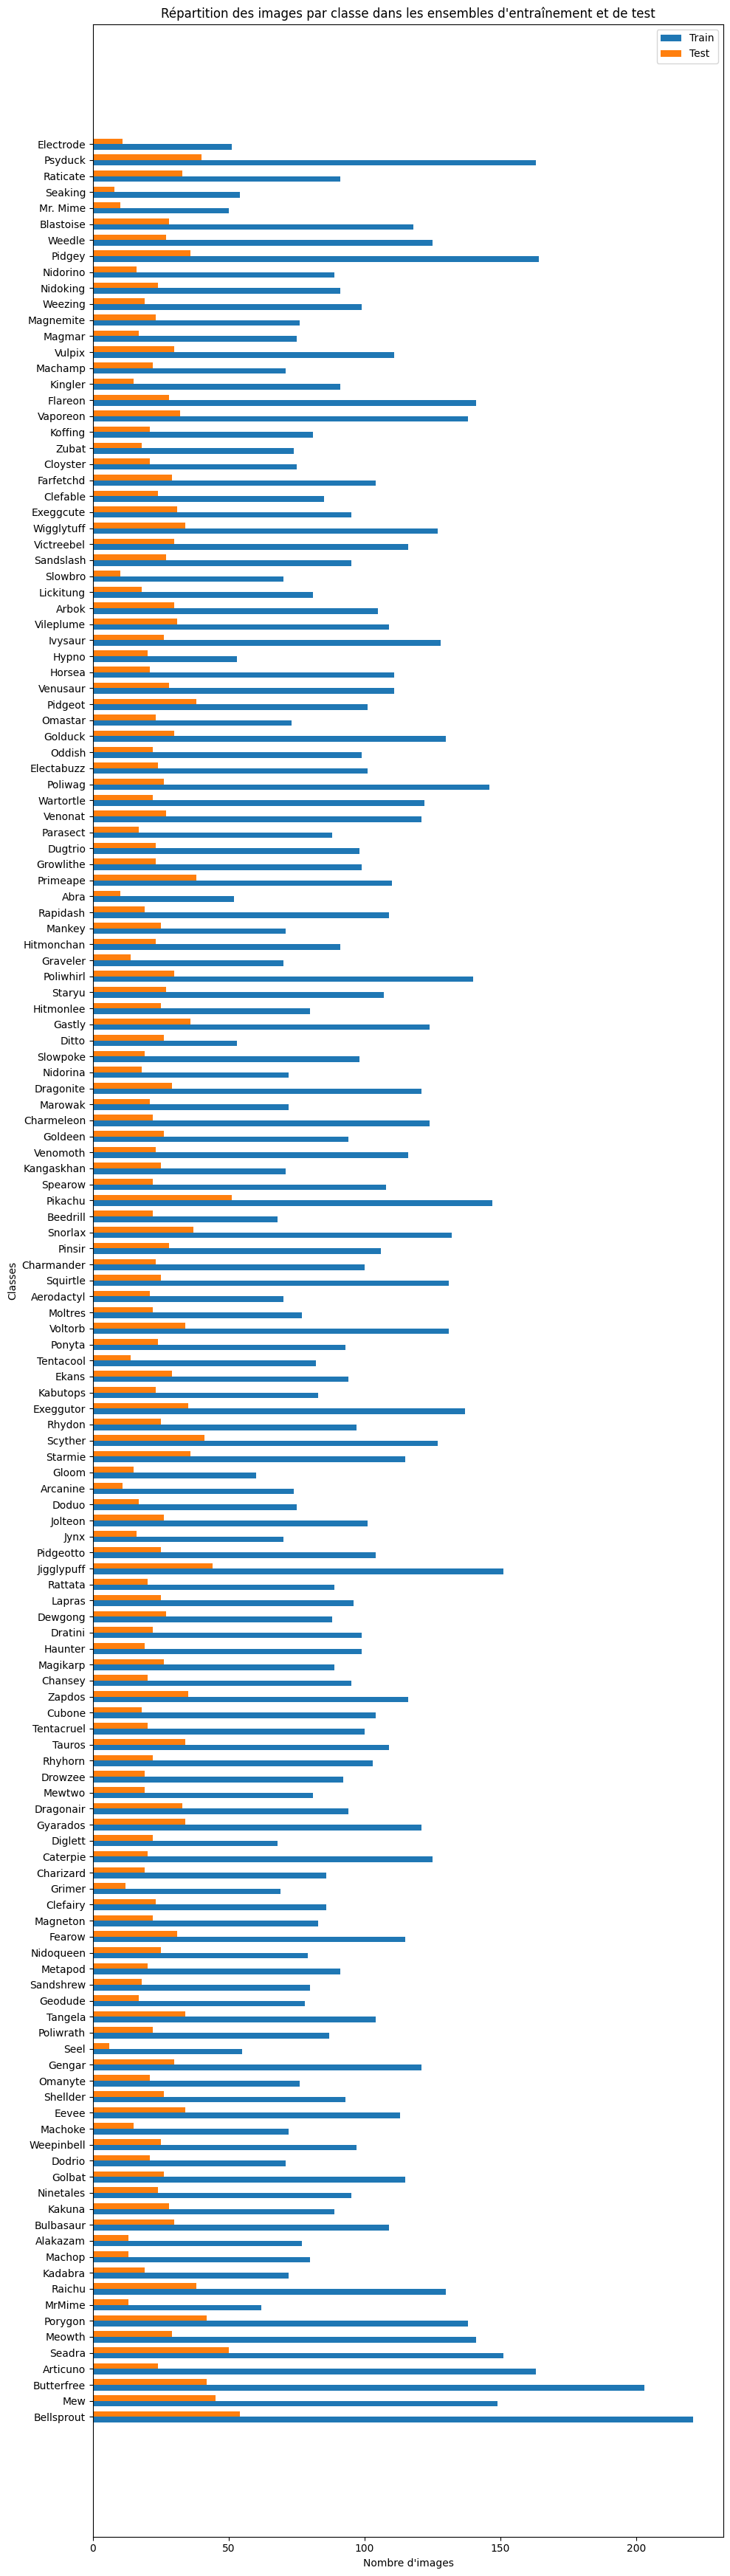

In [2]:
import matplotlib.pyplot as plt

# Compter le nombre d'images par classe dans les ensembles d'entraînement et de test
train_counts = [np.sum(y_train == i) for i in range(len(label_names))]
test_counts = [np.sum(y_test == i) for i in range(len(label_names))]

# Configuration du graphique
fig, ax = plt.subplots(figsize=(10, 35))
index = np.arange(len(label_names))
bar_height = 0.35

# Barres pour l'ensemble d'entraînement et de test
train_bar = ax.barh(index, train_counts, bar_height, label='Train')
test_bar = ax.barh(index + bar_height, test_counts, bar_height, label='Test')

# Ajouter des étiquettes
ax.set_ylabel('Classes')
ax.set_xlabel('Nombre d\'images')
ax.set_title('Répartition des images par classe dans les ensembles d\'entraînement et de test')
ax.set_yticks(index + bar_height / 2)
ax.set_yticklabels(label_names)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


In [3]:
num_classes = len(label_names)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Number of classes (should match the number of labels)

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape, input_shape, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# Entraîner le modèle



/home/eth/miniconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 143)            │        73,359 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,180,879 (19.76 MB)

 Trainable params: 5,180,879 (19.76 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train,
                    epochs=50,  # Ajustez le nombre d'époques selon vos besoins
                    batch_size=16,
                    shuffle=True,
                    validation_data=(X_test, y_test))

Epoch 1/50


I0000 00:00:1723154809.724267   21038 service.cc:146] XLA service 0x71b26c00df50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723154809.724326   21038 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-08-09 00:06:49.756914: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-09 00:06:49.910765: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-09 00:06:51.020316: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1112', 116 bytes spill stores, 116 bytes spill loads

2024-08-09 00:06:51.109392: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in f

 27/896 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0106 - loss: 22.9630      

I0000 00:00:1723154815.679740   21038 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


895/896 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0158 - loss: 6.1466

2024-08-09 00:07:01.709740: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1112', 116 bytes spill stores, 116 bytes spill loads

2024-08-09 00:07:02.051808: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1112', 144 bytes spill stores, 144 bytes spill loads



896/896 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0158 - loss: 6.1454

2024-08-09 00:07:03.795440: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_3', 68 bytes spill stores, 68 bytes spill loads

2024-08-09 00:07:05.072411: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_113', 344 bytes spill stores, 344 bytes spill loads

2024-08-09 00:07:07.351232: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_113', 460 bytes spill stores, 432 bytes spill loads



896/896 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.0158 - loss: 6.1442 - val_accuracy: 0.0586 - val_loss: 4.6610
Epoch 2/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0738 - loss: 4.4952 - val_accuracy: 0.2376 - val_loss: 3.5132
Epoch 3/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2628 - loss: 3.2673 - val_accuracy: 0.3868 - val_loss: 2.7129
Epoch 4/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4280 - loss: 2.4193 - val_accuracy: 0.4731 - val_loss: 2.3205
Epoch 5/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5481 - loss: 1.8212 - val_accuracy: 0.5320 - val_loss: 2.0610
Epoch 6/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6593 - loss: 1.3547 - val_accuracy: 0.5540 - val_loss: 2.0934
Epoch 7/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7262 - loss: 1.0291 - val_accuracy: 0.5725 - val_loss: 2.0785
Epoch 8/50
896/896 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7734 - loss: 0.8668 - val_accuracy: 0.5663 - va